**User EDAs -- Financial Transactions Dataset**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load data
df = pd.read_csv('../Data/users_data.csv')

df.head(10)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
5,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,$20599,$41997,$0,704,3
6,1075,36,67,1983,12,Female,5695 Fifth Street,38.22,-85.74,$25258,$51500,$102286,672,3
7,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,$26790,$54623,$114711,728,1
8,1116,81,66,1938,7,Female,11 Spruce Avenue,40.32,-75.32,$26273,$42509,$2895,755,5
9,1752,34,60,1986,1,Female,887 Grant Street,29.97,-92.12,$18730,$38190,$81262,810,1


In [ ]:
print(df.columns)
print(df.info)

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')
<bound method DataFrame.info of         id  current_age  retirement_age  birth_year  birth_month  gender  \
0      825           53              66        1966           11  Female   
1     1746           53              68        1966           12  Female   
2     1718           81              67        1938           11  Female   
3      708           63              63        1957            1  Female   
4     1164           43              70        1976            9    Male   
...    ...          ...             ...         ...          ...     ...   
1995   986           32              70        1987            7    Male   
1996  1944           62              65        1957           11  Female   
1997   185           47              6

In [ ]:
print(df.describe(include='O'))

df.isna().sum()

        gender              address per_capita_income yearly_income total_debt
count     2000                 2000              2000          2000       2000
unique       2                 1999              1754          1948       1880
top     Female  506 Washington Lane                $0        $44128         $0
freq      1016                    2                15             3        102


id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [ ]:
# So we have 2000 unique users, and the identifier will be 'id'
df['id'].duplicated().sum()

0

We notice that the following 3 columns contain dollar sign: 'per_capita_income','yearly_income', 'total_debt. We may want to remove them

In [ ]:
sign_col = ['per_capita_income','yearly_income', 'total_debt']
for col in sign_col:
    df[col] = df[col].astype(str).str.replace('$','')
    df[col] = pd.to_numeric(df[col].str.replace('[^0-9]','',regex=True),errors='coerce').fillna(0)
print(df.nunique())

id                   2000
current_age            80
retirement_age         29
birth_year             80
birth_month            12
gender                  2
address              1999
latitude              989
longitude            1224
per_capita_income    1754
yearly_income        1948
total_debt           1880
credit_score          321
num_credit_cards        9
dtype: int64


In [ ]:
print(df['current_age'].quantile([0.25,0.5,0.75,0.95,0.99,1]))


print(df['retirement_age'].quantile([0.25,0.5,0.75,0.95,0.99,1]))

0.25     30.00
0.50     44.00
0.75     58.00
0.95     80.05
0.99     90.00
1.00    101.00
Name: current_age, dtype: float64
0.25    65.0
0.50    66.0
0.75    68.0
0.95    72.0
0.99    74.0
1.00    79.0
Name: retirement_age, dtype: float64


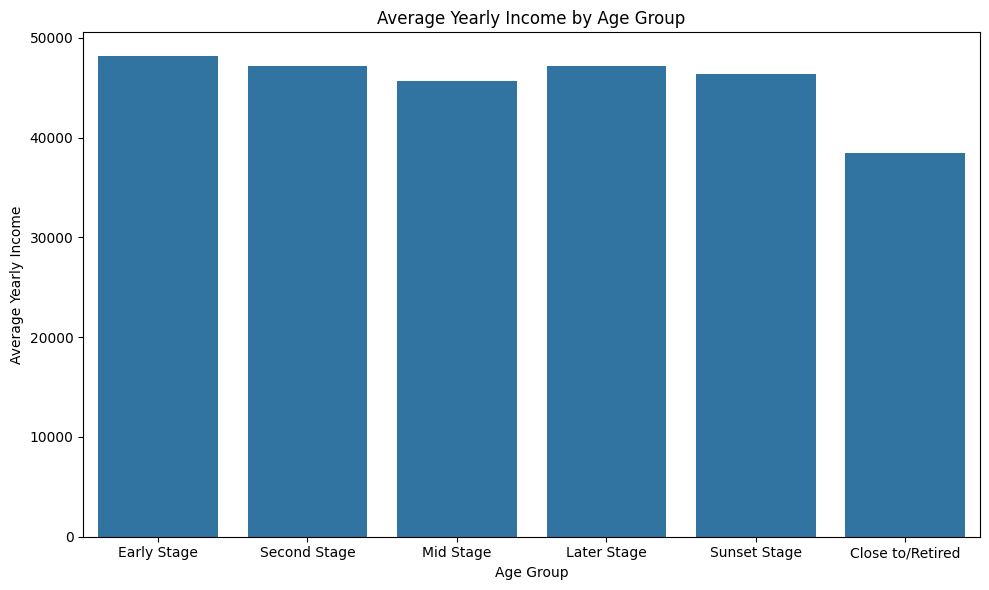

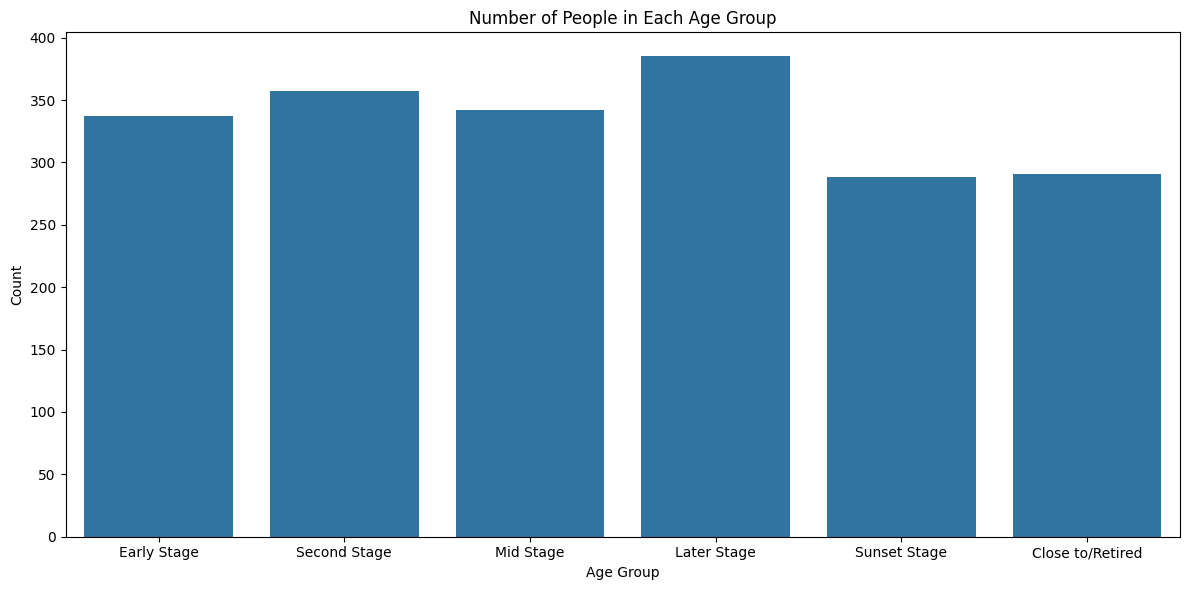

In [ ]:
# we want to plot a graph of average yearly income by age gorup
df['age_group'] = pd.cut(df['current_age'], bins=[16,25,35,45,55,65,105], labels=['Early Stage','Second Stage','Mid Stage','Later Stage','Sunset Stage','Close to/Retired'])


import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_group', y='yearly_income', estimator='mean', errorbar=None)
plt.title('Average Yearly Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Yearly Income')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(data=df, x='age_group', order=['Early Stage','Second Stage','Mid Stage','Later Stage','Sunset Stage','Close to/Retired'])
plt.title('Number of People in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
distribution = (df.groupby('age_group')['yearly_income'].agg(['count','mean','median']))
distribution['mean'] = distribution['mean'].round(0)
distribution['median'] = distribution['median'].round(0)
print(distribution)

                  count     mean   median
age_group                                
Early Stage         337  48157.0  43499.0
Second Stage        357  47150.0  42754.0
Mid Stage           342  45714.0  41271.0
Later Stage         385  47220.0  41965.0
Sunset Stage        288  46380.0  39198.0
Close to/Retired    291  38484.0  33897.0


C:\Users\Suzreal\AppData\Local\Temp\ipykernel_25584\994213465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = (df.groupby('age_group')['yearly_income'].agg(['count','mean','median']))


Insights: I first check the age distribution of user of this data set, and we split them into 5 groups to see if they can provide us with more insights.

Following the suggestions of GenAI, I split the age into 6 different stages of career while try to make sure the number of users are as evenly distributed as possible.


Surprisingly, younger group tends to have higher income than the older group

It comes with another question, how about debt?

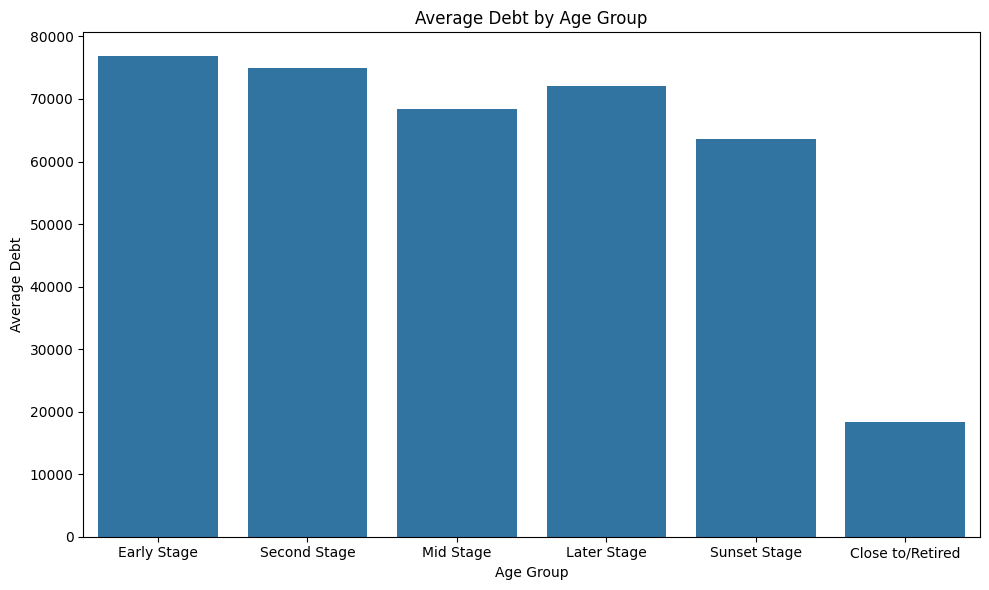

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_group', y='total_debt', estimator='mean', errorbar=None)
plt.title('Average Debt by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Debt')
plt.tight_layout()
plt.show()


As we can see from above, higher income group(younger group) tends to have higher total debt, which make sense. In addition, people who at their early career stage need extra money for something like mortgage.

**Geo Distribution Based on Income**

In [ ]:
df['income_level'] = pd.qcut(df['yearly_income'], q=5, labels=['Very Low','Low','Medium','High','Very High'])

df.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'age_group', 'income_level'],
      dtype='object')

In [ ]:
# As we have the location data, we can plot the distribution of users by state

import plotly.express as px

fig = px.scatter_geo(df,lat='latitude',lon='longitude',color='income_level',scope='usa',title='Geographical Distribution of Income Levels'
)

fig.show()


Most of the very high income group are located in Northeastern US and West Coast.


Then, Let's take a look at the relationship between credit score and income.

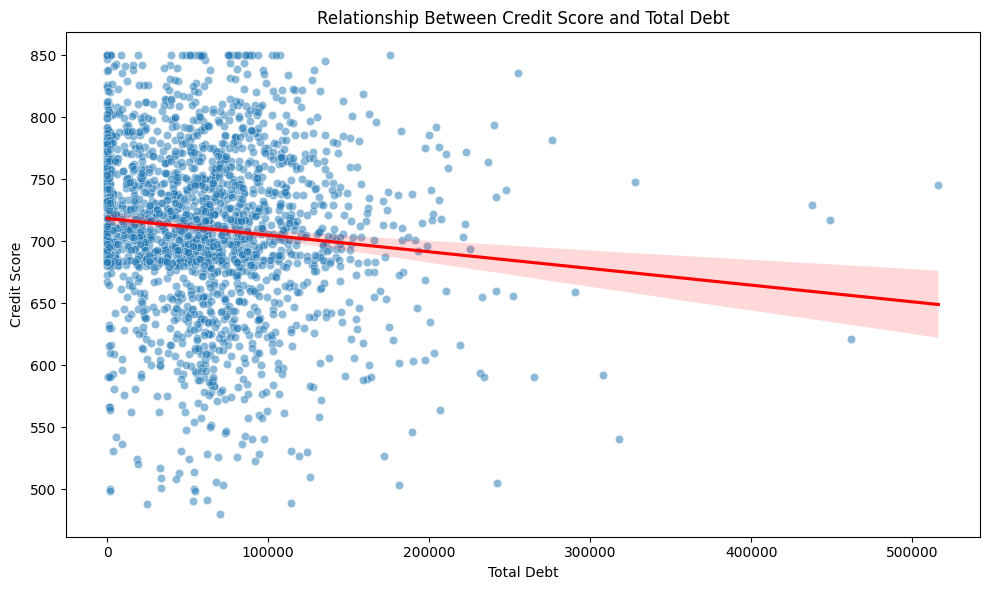

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='total_debt',y='credit_score',alpha=0.5)
sns.regplot(data=df,x='total_debt',y='credit_score',scatter=False, color='red')

plt.title('Relationship Between Credit Score and Total Debt')
plt.xlabel('Total Debt')
plt.ylabel('Credit Score')
plt.tight_layout()
plt.show()

Based on the above graph, we can see that while many people with large debts can still have solid credit scores, the overall pattern is a negative relationship: on average, more debt corresponds to lower credit scores.

This EDA should serves as an initial exploration to the data set, and suggest some insights that we can use for user segementation.

Many meaningful labels can be used for segmentation in this data set, for example, age group, yearly income, or relative income, as we have per capita income based on region.

As showing in the above, there are some connection between age, income, debt and credit score, we might generalized these labels to create a segmentation metrics that connected with our goal.

In [4]:
df2 = pd.read_csv("../Data/transactions_data.csv")

print(df2.head())

        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


In [8]:
result = (
    df2.merge(df[['id', 'current_age']], 
              left_on='client_id',        
              right_on='id',              
              how='left')                 
    .loc[:, ['date', 'amount', 'current_age']]  
)
result['amount'] = (
    result['amount']
    .str.replace(r'[\$,]', '', regex=True)  
    .astype(float)                          
)
print(result.head())

                  date  amount  current_age
0  2010-01-01 00:01:00  -77.00           30
1  2010-01-01 00:02:00   14.57           48
2  2010-01-01 00:02:00   80.00           49
3  2010-01-01 00:05:00  200.00           52
4  2010-01-01 00:06:00   46.41           51


             count           sum       mean
age_group                                  
<25          16221  7.740230e+05  47.717340
25-34      1229086  5.786165e+07  47.076975
35-44      2808998  1.145703e+08  40.786907
45-54      3517726  1.529734e+08  43.486433
55-64      2613263  1.111608e+08  42.537147
65-74      1320992  5.990963e+07  45.352004
75-84      1224294  5.152093e+07  42.082153
85+         559923  2.277306e+07  40.671780


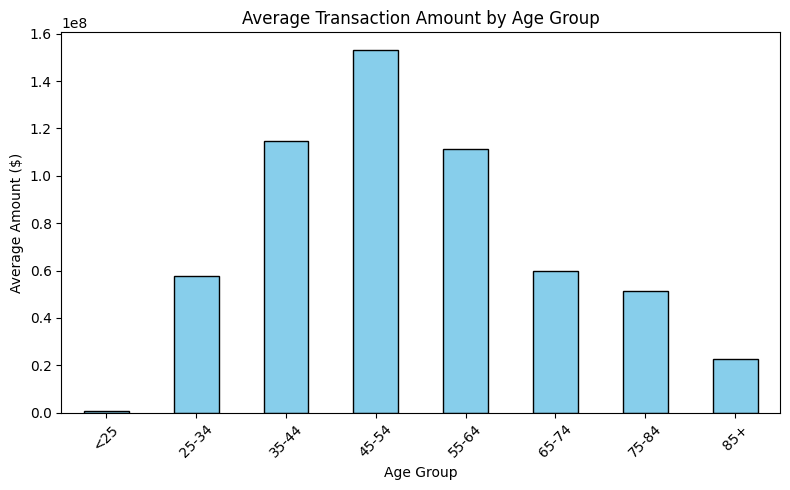

In [15]:
bins = [0, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

result['age_group'] = pd.cut(result['current_age'], bins=bins, labels=labels, right=False)

summary = result.groupby('age_group',observed=True)['amount'].agg(['count', 'sum', 'mean'])

print(summary)

plt.figure(figsize=(8,5))
summary['sum'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Transaction Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

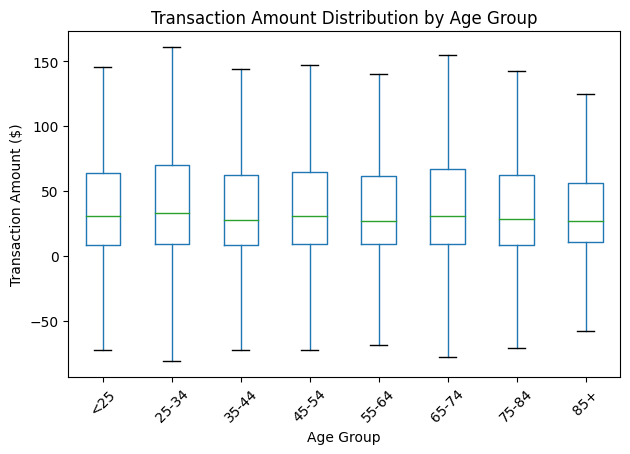

In [12]:
plt.figure(figsize=(8,6))
result.boxplot(column='amount', by='age_group', grid=False, showfliers=False)  


plt.title("Transaction Amount Distribution by Age Group")
plt.suptitle("")  
plt.xlabel("Age Group")
plt.ylabel("Transaction Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

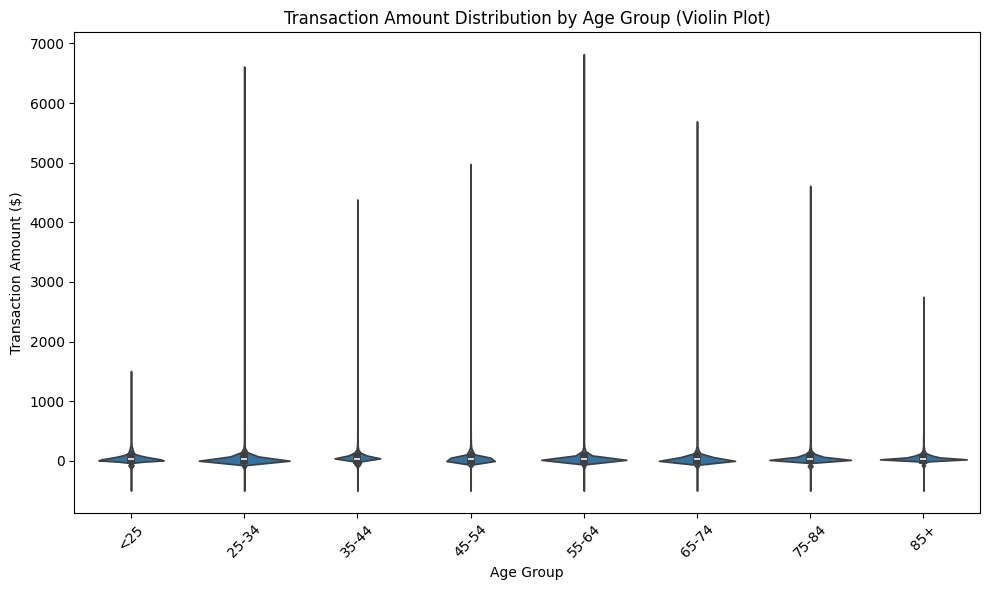

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(data=result, x='age_group', y='amount', inner='box', cut=0)

plt.title("Transaction Amount Distribution by Age Group (Violin Plot)")
plt.xlabel("Age Group")
plt.ylabel("Transaction Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
result.to_csv("result.csv", index=False, encoding="utf-8-sig")